# BASIC OPERATIONS

### 1. $\pi$ using Bailey-Borwein-Plouffe formula:

### $\pi = \sum_{k=0}^{\infty}[\frac{1}{16^k}(\frac{4}{8k+1}-\frac{2}{8k+4}-\frac{1}{8k+5}-\frac{1}{8k+6})]$ 

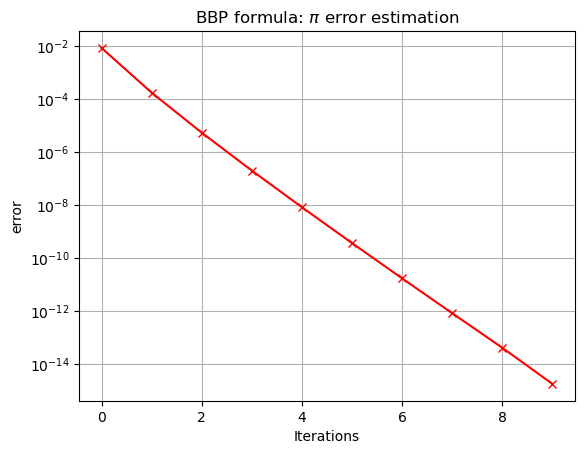

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
pi_theo = math.pi
pi_iter = 0
k = 0
error = abs(math.pi-pi_iter)
error_list = []
pi_iter_list = []
while error > 10**(-14):
    pi_iter = pi_iter + (1/16**k)*((4/(8*k+1))-(2/(8*k+4))-(1/(8*k+5))-(1/(8*k+6)))
    pi_iter_list.append(pi_iter)
    k = k + 1
    error = abs(math.pi-pi_iter)
    error_list.append(error)
plt.title("BBP formula: $\pi$ error estimation")
plt.xlabel("Iterations")
plt.ylabel("error")
plt.plot(np.arange(0,k,1),error_list,"r-x")
plt.yscale("log")
plt.grid()
plt.show()

In [2]:
import csv
with open("pi_error.csv","w",newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Index", "Error"])
    for i in range(len(error_list)):
        writer.writerow([i,error_list[i]])

### 2. $\pi$ using the following integrals:

$\int_{-\infty}^{\infty}exp(-x^2)dx = \sqrt\pi$

$\int_{-\infty}^{\infty}\frac{1}{1+x^2}dx = \pi$

In [3]:
import scipy as sc
def func1(x):
    func1 = np.e**(-x**2)
    return func1
def func2(x):
    func2 =  1/(1+x**2)
    return func2
pi_quad1 = sc.integrate.quad(func1,-np.inf,np.inf)
pi_quad2 = sc.integrate.quad(func2,-np.inf,np.inf)
print("pi_quad func1 = ",pi_quad1[0]**2,"error =", pi_quad1[1]**2,"\npi_quad func2 = ",pi_quad2[0],"error =", pi_quad2[1])

pi_quad func1 =  3.1415926535897936 error = 2.0171489154202628e-16 
pi_quad func2 =  3.141592653589793 error = 5.155583041103855e-10


The simpson method needs an array of the function evaluated in a close interval [-L,L] in this case where $L = \infty$ the quad method is much better becasue we do not need to estimate the interval.

Let's try to use the simpson method

In [4]:
L = 100
N = 1001 #MUST BE ODD
x = np.arange(-L,L,1/N)
y1 = func1(x)
y2 = func2(x)
pi_simp1 = sc.integrate.simpson(y1,x=x)
pi_simp2 = sc.integrate.simpson(y2,x=x)
print("pi_simp func1 = ",pi_simp1**2,"error =", abs(pi_simp1**2-np.pi),"\npi_simp func2 = ",pi_simp2,"error =", abs(pi_simp2**2-np.pi))

pi_simp func1 =  3.141592653589792 error = 1.3322676295501878e-15 
pi_simp func2 =  3.1215932203253725 error = 6.602751579591537


We can se that for function 1, the setup I choose is enough for the number to converg. However, for function 2 we need to add a bigger L or a bigger N.

### 2. $\pi$ using quotien between section of a circunference of diamater L and the section of a square of side L. Monte-Carlo method


3.140939597315436 0.0006530562743569668 149


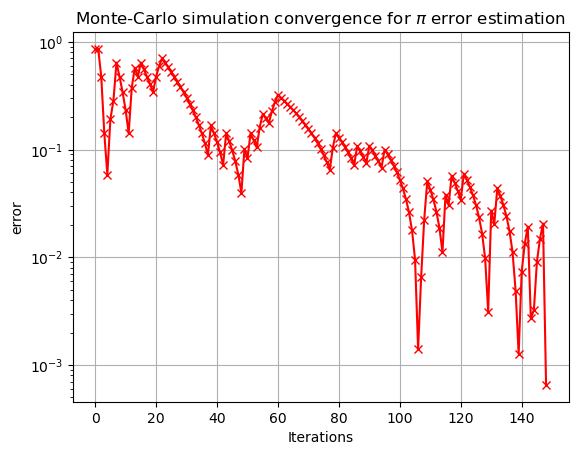

In [5]:
r = 5
center = (5,5)
dins = 0
totals = 0
error = np.pi
error_list = []
while error>10**(-3):
    x_guess = np.random.uniform(0,10)
    y_guess = np.random.uniform(0,10)
    v = (x_guess-center[0],y_guess-center[1])
    d = np.sqrt(v[0]**2+v[1]**2)
    if d <= r:
        dins = dins+1
        totals = totals+1
    else:
        totals = totals+1
    error = abs(4*dins/totals-np.pi)
    error_list.append(error)
x = np.arange(totals)

print(4*dins/totals,error,totals)

plt.title("Monte-Carlo simulation convergence for $\pi$ error estimation")
plt.xlabel("Iterations")
plt.ylabel("error")
plt.yscale("log")
plt.plot(x,error_list,"r-x")
plt.grid()

The main idea is that if we throw random unfiorm points in a region, the fraction of point that go inside the figure is proportional to the its area. So by the law of large numbers: $P(inside) = \frac{circle}{square}=\frac{\pi r^2}{(2r)^2}=f\rightarrow \pi=4f$ where $f$ is the fraction of points inside and total.

# Numpy: Representation of the groups Mandelbrot and Julia

The group of Mandelbrot is defined as the group of points $c\in C$ which the succession $z_{n+1}=z_n^2+c$ with $z_0 = 0$ converges. It can be proved that the serie converges if $||z_nz||<2$.

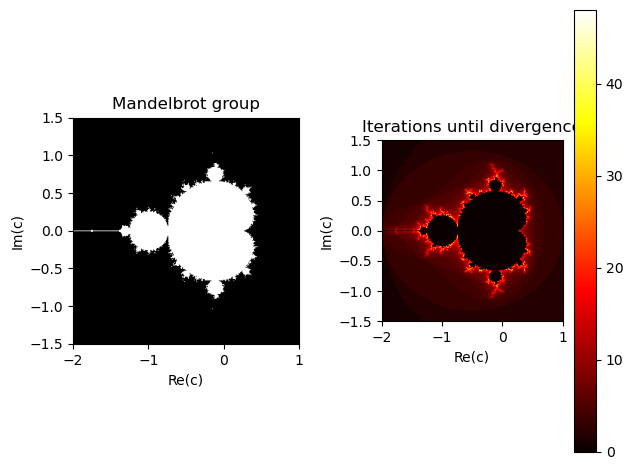

In [7]:
real = np.arange(-2,1,0.01)
im = np.arange(-1.5,1.5,0.01)
x,y = np.meshgrid(real,im)
c = x+1j*y
M = np.zeros(c.shape, dtype=int)
CM = np.zeros(c.shape, dtype=int)
for l in range(2,50):
    for i in range(len(CM)):
        for j in range(len(CM[i])):
            z=0
            for k in range(1,l):
                z = z**2+c[i][j]
                if np.abs(z)>2:
                    CM[i][j] = 0
                    M[i][j] = k
                    break
            else:
                CM[i][j] = 1
                M[i][j] = 0
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.title("Mandelbrot group")
    plt.imshow(CM, cmap="gray", extent=[-2, 1, -1.5, 1.5])
    if l <11:
        plt.savefig(f"Mandelbrot GIF/0{l-1}.png")
    else:
        plt.savefig(f"Mandelbrot GIF/{l-1}.png")
    plt.title("Iterations until divergence")
    plt.imshow(M, cmap='hot', extent=[-2, 1, -1.5, 1.5])
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar()
    if l <11:
        plt.savefig(f"Mandelbrot_color GIF/0{l-1}.png")
    else:
        plt.savefig(f"Mandelbrot_color GIF/{l-1}.png")
    plt.close()

plt.subplot(121)
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot group")
plt.imshow(CM, cmap="gray", extent=[-2, 1, -1.5, 1.5])
plt.subplot(122)
plt.title("Iterations until divergence")
plt.imshow(M, cmap='hot', extent=[-2, 1, -1.5, 1.5])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar()
plt.tight_layout()
plt.show()

In [8]:
import imageio
import os
folder_path1 = "Mandelbrot GIF"
filenames1 = os.listdir(folder_path1)
folder_path2 = "Mandelbrot_color GIF"
filenames2 = os.listdir(folder_path2)
images1 = []
images2 = []

for filename in filenames1:
    images1.append(imageio.imread(f"Mandelbrot GIF/{filename}"))
for filename in filenames2:
    images2.append(imageio.imread(f"Mandelbrot_color GIF/{filename}"))
imageio.mimsave('Mandelbrot.gif', images1)
imageio.mimsave('Mandelbrot_color.gif', images2)

C:\Users\Albert\AppData\Local\Temp\ipykernel_17004\557782372.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images1.append(imageio.imread(f"Mandelbrot GIF/{filename}"))
C:\Users\Albert\AppData\Local\Temp\ipykernel_17004\557782372.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images2.append(imageio.imread(f"Mandelbrot_color GIF/{filename}"))


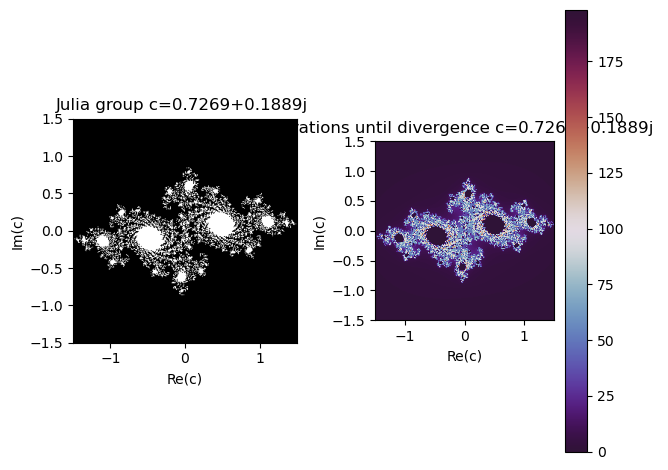

In [44]:
real = np.arange(-1.5,1.5,0.01)
im = np.arange(-1.5,1.5,0.01)
x,y = np.meshgrid(real,im)
z = x+1j*y
c = -0.7269 + 0.1889j
M = np.zeros(z.shape, dtype=int)
CM = np.zeros(z.shape, dtype=int)
for l in range(2,200):
    for i in range(len(CM)):
        for j in range(len(CM[i])):
            z_=z[i][j]
            for k in range(1,l):
                z_ = z_**2+c
                if np.abs(z_)>2:
                    CM[i][j] = 0
                    M[i][j] = k
                    break
            else:
                CM[i][j] = 1
                M[i][j] = 0
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.title("Julia group c=0.7269+0.1889j ")
    plt.imshow(CM, cmap="gray", extent=[-1.5, 1.5, -1.5, 1.5])
    if l <11:
        plt.savefig(f"Julia GIF/00{l-1}.png")
    elif 10<l<101:
        plt.savefig(f"Julia GIF/0{l-1}.png")
    else:
        plt.savefig(f"Julia GIF/{l-1}.png")
    plt.title("Iterations until divergence c=0.7269+0.1889j ")
    plt.imshow(M, cmap='twilight_shifted', extent=[-1.5, 1.5, -1.5, 1.5])
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar()
    if l <11:
        plt.savefig(f"Julia_color GIF/00{l-1}.png")
    elif 10<l<101:
        plt.savefig(f"Julia_color GIF/0{l-1}.png")
    else:
        plt.savefig(f"Julia_color GIF/{l-1}.png")
    plt.close()

plt.subplot(121)
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Julia group c=0.7269+0.1889j ")
plt.imshow(CM, cmap="gray", extent=[-1.5, 1.5, -1.5, 1.5])
plt.subplot(122)
plt.title("Iterations until divergence c=0.7269+0.1889j ")
plt.imshow(M, cmap='twilight_shifted', extent=[-1.5, 1.5, -1.5, 1.5])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar()
plt.tight_layout()
plt.show()

In [48]:
import imageio
import os
folder_path1 = "Julia GIF"
filenames1 = os.listdir(folder_path1)
folder_path2 = "Julia_color GIF"
filenames2 = os.listdir(folder_path2)
images1 = []
images2 = []

for filename in filenames1:
    images1.append(imageio.imread(f"Julia GIF/{filename}"))
for filename in filenames2:
    images2.append(imageio.imread(f"Julia_color GIF/{filename}"))
imageio.mimsave('Julia.gif', images1)
imageio.mimsave('Julia_color.gif', images2)

C:\Users\Albert\AppData\Local\Temp\ipykernel_19392\3921814466.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images1.append(imageio.imread(f"Julia GIF/{filename}"))
C:\Users\Albert\AppData\Local\Temp\ipykernel_19392\3921814466.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images2.append(imageio.imread(f"Julia_color GIF/{filename}"))


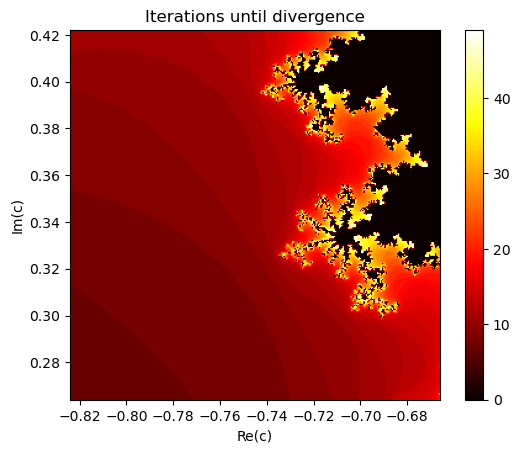

In [9]:
for l in range(50):
    real = np.linspace(-2+0.024*l,1-0.034*l,num=300)
    im = np.linspace(-1.5+0.036*l,1.5-0.022*l,num=300)
    x,y = np.meshgrid(real,im)
    c = x+1j*y
    M = np.zeros(c.shape, dtype=int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            z=0
            for k in range(1,50):
                z = z**2+c[i][j]
                if np.abs(z)>2:
                    M[i][j] = k
                    break
            else:
                M[i][j] = 0

    plt.title("Iterations until divergence")
    plt.imshow(M, cmap='hot', extent=[-2+0.024*l,1-0.034*l,-1.5+0.036*l,1.5-0.022*l])
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar()
    if l <10:
        plt.savefig(f"Mandelbrot_zoom GIF/0{l}.png")
    else:
        plt.savefig(f"Mandelbrot_zoom GIF/{l}.png")
    plt.close()


plt.title("Iterations until divergence")
plt.imshow(M, cmap='hot', extent=[-2+0.024*l,1-0.034*l,-1.5+0.036*l,1.5-0.022*l])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar()
plt.show()

In [10]:
import imageio
import os
folder_path = "Mandelbrot_zoom GIF"
filenames = os.listdir(folder_path)

images = []
for filename in filenames:
    images.append(imageio.imread(f"Mandelbrot_zoom GIF/{filename}"))

imageio.mimsave('Mandelbrot_zoom.gif', images)


C:\Users\Albert\AppData\Local\Temp\ipykernel_17004\3312268378.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"Mandelbrot_zoom GIF/{filename}"))


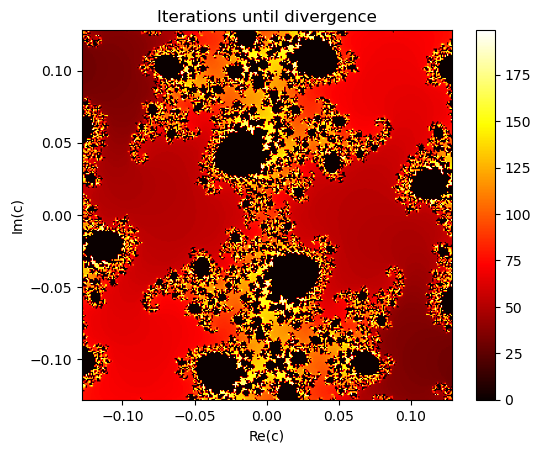

In [13]:
for l in range(50):
    real = np.linspace(-1.5+0.028*l,1.5-0.028*l,num=300)
    im = np.linspace(-1.5+0.028*l,1.5-0.028*l,num=300)
    x,y = np.meshgrid(real,im)
    z = x+1j*y
    c = -0.7269 + 0.1889j
    M = np.zeros(z.shape, dtype=int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            z_=z[i][j]
            for k in range(1,200):
                z_ = z_**2+c
                if np.abs(z_)>2:
                    M[i][j] = k
                    break
            else:
                M[i][j] = 0

    plt.title("Iterations until divergence")
    plt.imshow(M, cmap='twilight_shifted', extent=[-1.5+0.028*l,1.5-0.028*l,-1.5+0.028*l,1.5-0.028*l])
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar()
    if l <10:
        plt.savefig(f"Julia_zoom GIF/00{l}.png")
    else:
        plt.savefig(f"Julia_zoom GIF/{l}.png")
    plt.close()


plt.title("Iterations until divergence")
plt.imshow(M, cmap='twilight_shifted', extent=[-1.5+0.028*l,1.5-0.028*l,-1.5+0.028*l,1.5-0.028*l])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar()
plt.show()

In [14]:
import imageio
import os
folder_path = "Julia_zoom GIF"
filenames = os.listdir(folder_path)

images = []
for filename in filenames:
    images.append(imageio.imread(f"Julia_zoom GIF/{filename}"))

imageio.mimsave('Julia_zoom.gif', images)


C:\Users\Albert\AppData\Local\Temp\ipykernel_17004\3394548556.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"Julia_zoom GIF/{filename}"))
